In [1]:
import tensorflow as tf
import numpy as np

2023-04-02 11:34:28.485655: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
from sklearn.metrics import accuracy_score


%matplotlib inline
np.random.seed(10)

colors = ['red', "blue"]
labels_cmap = ListedColormap(colors, 2)
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
main_cmap = LinearSegmentedColormap.from_list("main_scheme", colors, N=300)

def show_data(X, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y))
    

def show_descision_boundary(clf, limits, binary=False, X=None, y=None, n_lines=10, show_lines=False,
                           figsize=(5, 5), ax=None):
    if limits is None:
        if X is not None:
            xs = [X[:, 0].min() - .3, X[:, 0].max() + .3]
            ys = [X[:, 1].min() - .3, X[:, 1].max() + .3]
        else:
            xs = [-1, 1]
            ys = [-1, 1]
    else:
        xs, ys = limits
    
    x_min, x_max = xs
    y_min, y_max = ys
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)
    
    if binary:
        Z = clf.predict(np.c_[xx.ravel(), xx.ravel()])
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        norm = Normalize(vmin=0.,vmax=1.)
    else:
        Z = clf(np.c_[xx.ravel(), xx.ravel()])
        Z = clf(np.c_[xx.ravel(), yy.ravel()])
        #if clf.prob_output:
        #    norm = Normalize(vmin=0.,vmax=1.)
        #else:
        norm = Normalize(vmin=-10.,vmax=10., clip=True)
        Z = Z.numpy() 
    
    Z = Z.reshape(xx.shape)
    Z = Z.astype(np.float32)
    
    ax.contourf(xx, yy, Z, n_lines, alpha=0.4, cmap=main_cmap, norm=norm)
    if show_lines:
        cp = ax.contour(xx, yy, Z, n_lines)
        ax.clabel(cp, inline=True, 
              fontsize=10, colors="green")
    
    if y is not None:
        X = np.array(X)
        y = np.array(y)
        ax.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y),
                   zorder=4)
        

def eval_model(model, X, y):
    accuracy = model.evaluate(X, y)[1]
    if accuracy == 1.0:
        print("Perfect!")
    elif  accuracy > 0.9:
        print("Well done! Can you make 100%?")
    else:
        print("Don't give up!")
    return accuracy

# I XOR task

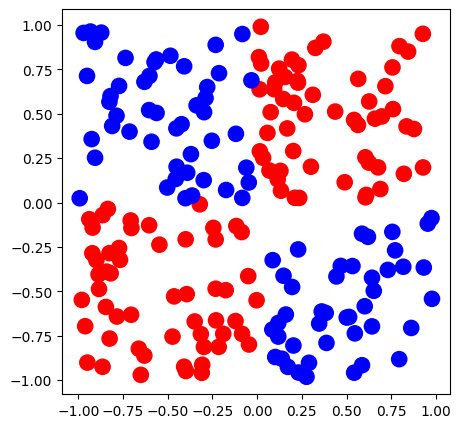

In [3]:
X = np.random.rand(200, 2) - .5
y = ((X[:, 0] < 0) ^ (X[:, 1] < 0))
X = X * 2
show_data(X, y)

In [4]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(15, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=.001)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200


2023-04-02 11:34:37.863244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


4/4 [==============================] - 1s 4ms/step - loss: 0.7000 - accuracy: 0.5450
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5450
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5450
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5450
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6695 - accuracy: 0.5450
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6638 - accuracy: 0.5450
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.5450
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.5450
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.6473 - accuracy: 0.5450
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.5450
Epoch 11/200
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9650
Epoch 85/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1090 - accuracy: 0.9650
Epoch 86/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9600
Epoch 87/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9600
Epoch 88/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1040 - accuracy: 0.9600
Epoch 89/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9650
Epoch 90/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0999 - accuracy: 0.9650
Epoch 91/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.9650
Epoch 92/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9650
Epoch 93/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0945 - accuracy: 0.9700
Epoch 94/200
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9850
Epoch 168/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9850
Epoch 169/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9850
Epoch 170/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9900
Epoch 171/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9900
Epoch 172/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9900
Epoch 173/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9900
Epoch 174/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9850
Epoch 175/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9850
Epoch 176/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9850
Epoch 177/200
4/4 [=====

7/7 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9900
Well done! Can you make 100%?


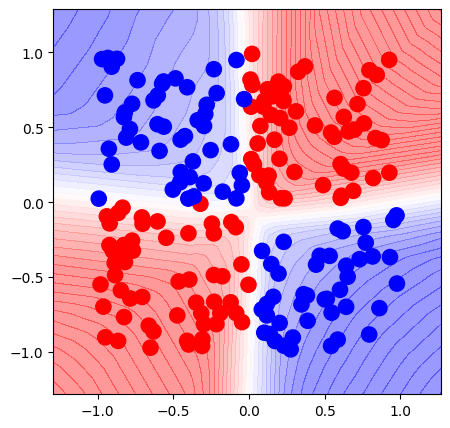

In [5]:
limits = [[-.6, 0.6], [-.6, .6]]
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                        X=X,
                        y=y,
                        n_lines=50,
                        show_lines=False)

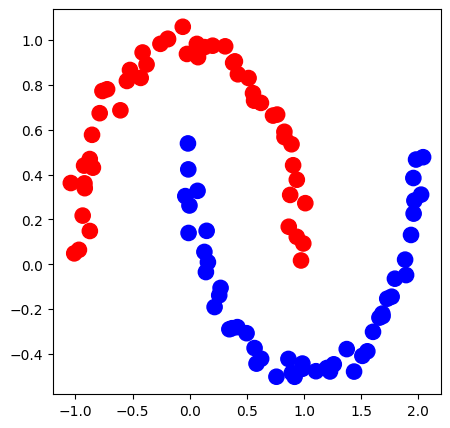

In [6]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=.04)
show_data(X, y)

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(15, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=.01)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 [==============================] - 1s 4ms/step - loss: 0.7073 - accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6331 - accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 0.5748 - accuracy: 0.5700
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 0.5219 - accuracy: 0.7500
Epoch 5/200
2/2 [==============================] - 0s 4ms/step - loss: 0.4658 - accuracy: 0.8200
Epoch 6/200
2/2 [==============================] - 0s 13ms/step - loss: 0.4108 - accuracy: 0.8400
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 0.3640 - accuracy: 0.8600
Epoch 8/200
2/2 [==============================] - 0s 7ms/step - loss: 0.3243 - accuracy: 0.8700
Epoch 9/200
2/2 [==============================] - 0s 11ms/step - loss: 0.3020 - accuracy: 0.8600
Epoch 10/200
2/2 [==============================] - 0s 10ms/step - loss: 0.2871 - accuracy: 0.8600
Epoch 11/200
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 8.6724e-04 - accuracy: 1.0000
Epoch 85/200
2/2 [==============================] - 0s 4ms/step - loss: 8.4264e-04 - accuracy: 1.0000
Epoch 86/200
2/2 [==============================] - 0s 6ms/step - loss: 8.2192e-04 - accuracy: 1.0000
Epoch 87/200
2/2 [==============================] - 0s 6ms/step - loss: 7.9384e-04 - accuracy: 1.0000
Epoch 88/200
2/2 [==============================] - 0s 6ms/step - loss: 7.7650e-04 - accuracy: 1.0000
Epoch 89/200
2/2 [==============================] - 0s 5ms/step - loss: 7.4391e-04 - accuracy: 1.0000
Epoch 90/200
2/2 [==============================] - 0s 6ms/step - loss: 7.2464e-04 - accuracy: 1.0000
Epoch 91/200
2/2 [==============================] - 0s 12ms/step - loss: 7.0654e-04 - accuracy: 1.0000
Epoch 92/200
2/2 [==============================] - 0s 6ms/step - loss: 6.8557e-04 - accuracy: 1.0000
Epoch 93/200
2/2 [==============================] - 0s 4ms/step - loss: 6.7123e-04 - accuracy:

2/2 [==============================] - 0s 5ms/step - loss: 1.8825e-04 - accuracy: 1.0000
Epoch 164/200
2/2 [==============================] - 0s 3ms/step - loss: 1.8580e-04 - accuracy: 1.0000
Epoch 165/200
2/2 [==============================] - 0s 7ms/step - loss: 1.8360e-04 - accuracy: 1.0000
Epoch 166/200
2/2 [==============================] - 0s 5ms/step - loss: 1.8117e-04 - accuracy: 1.0000
Epoch 167/200
2/2 [==============================] - 0s 5ms/step - loss: 1.7898e-04 - accuracy: 1.0000
Epoch 168/200
2/2 [==============================] - 0s 6ms/step - loss: 1.7667e-04 - accuracy: 1.0000
Epoch 169/200
2/2 [==============================] - 0s 3ms/step - loss: 1.7469e-04 - accuracy: 1.0000
Epoch 170/200
2/2 [==============================] - 0s 7ms/step - loss: 1.7233e-04 - accuracy: 1.0000
Epoch 171/200
2/2 [==============================] - 0s 3ms/step - loss: 1.7044e-04 - accuracy: 1.0000
Epoch 172/200
2/2 [==============================] - 0s 8ms/step - loss: 1.6933e-04 - a

4/4 [==============================] - 0s 2ms/step - loss: 1.2402e-04 - accuracy: 1.0000
Perfect!


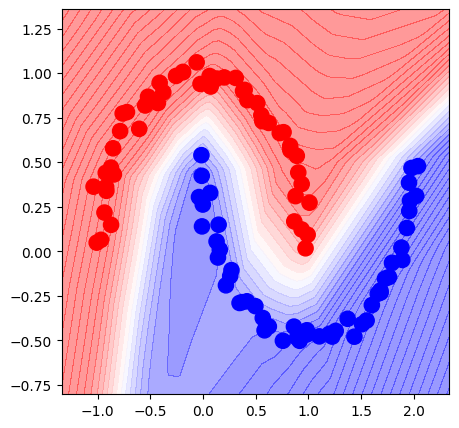

In [8]:
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                        X=X,
                        y=y,
                        n_lines=50,
                        show_lines=False)

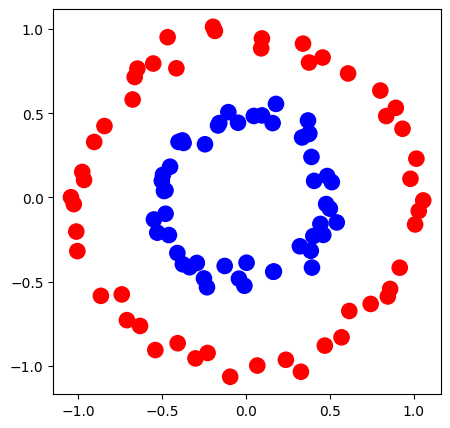

In [13]:
from sklearn.datasets import make_circles

X, y = make_circles(factor=.5, noise=.05)
show_data(X, y)

In [14]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(1))

opotimizer = tf.keras.optimizers.Adam(learning_rate=.01)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer=opotimizer, loss=loss, metrics=['accuracy'])
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 [==============================] - 1s 5ms/step - loss: 0.7033 - accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 10ms/step - loss: 0.6965 - accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 0s 13ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6849 - accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6805 - accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6771 - accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6720 - accuracy: 0.5000
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6683 - accuracy: 0.5000
Epoch 9/200
2/2 [==============================] - 0s 7ms/step - loss: 0.6645 - accuracy: 0.5000
Epoch 10/200
2/2 [==============================] - 0s 9ms/step - loss: 0.6607 - accuracy: 0.5000
Epoch 11/200
2/2 [=========

2/2 [==============================] - 0s 6ms/step - loss: 0.4369 - accuracy: 0.8400
Epoch 85/200
2/2 [==============================] - 0s 5ms/step - loss: 0.4348 - accuracy: 0.8400
Epoch 86/200
2/2 [==============================] - 0s 6ms/step - loss: 0.4315 - accuracy: 0.8400
Epoch 87/200
2/2 [==============================] - 0s 4ms/step - loss: 0.4287 - accuracy: 0.8500
Epoch 88/200
2/2 [==============================] - 0s 12ms/step - loss: 0.4259 - accuracy: 0.8500
Epoch 89/200
2/2 [==============================] - 0s 4ms/step - loss: 0.4239 - accuracy: 0.8500
Epoch 90/200
2/2 [==============================] - 0s 4ms/step - loss: 0.4208 - accuracy: 0.8500
Epoch 91/200
2/2 [==============================] - 0s 4ms/step - loss: 0.4181 - accuracy: 0.8600
Epoch 92/200
2/2 [==============================] - 0s 4ms/step - loss: 0.4157 - accuracy: 0.8600
Epoch 93/200
2/2 [==============================] - 0s 4ms/step - loss: 0.4128 - accuracy: 0.8600
Epoch 94/200
2/2 [==============

Epoch 167/200
2/2 [==============================] - 0s 7ms/step - loss: 0.2202 - accuracy: 0.9900
Epoch 168/200
2/2 [==============================] - 0s 4ms/step - loss: 0.2184 - accuracy: 0.9900
Epoch 169/200
2/2 [==============================] - 0s 5ms/step - loss: 0.2166 - accuracy: 0.9900
Epoch 170/200
2/2 [==============================] - 0s 7ms/step - loss: 0.2146 - accuracy: 0.9900
Epoch 171/200
2/2 [==============================] - 0s 4ms/step - loss: 0.2128 - accuracy: 1.0000
Epoch 172/200
2/2 [==============================] - 0s 5ms/step - loss: 0.2109 - accuracy: 1.0000
Epoch 173/200
2/2 [==============================] - 0s 11ms/step - loss: 0.2092 - accuracy: 1.0000
Epoch 174/200
2/2 [==============================] - 0s 4ms/step - loss: 0.2073 - accuracy: 1.0000
Epoch 175/200
2/2 [==============================] - 0s 4ms/step - loss: 0.2056 - accuracy: 1.0000
Epoch 176/200
2/2 [==============================] - 0s 8ms/step - loss: 0.2038 - accuracy: 1.0000
Epoch 177

4/4 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 1.0000
Perfect!
Bonus points!


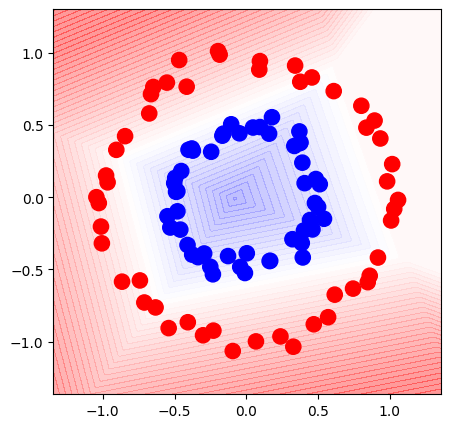

In [17]:
accuracy = eval_model(model, X, y)
if model.count_params() < 18 and accuracy == 1.0:
    print('Bonus points!')
else:
    print(f'Model has {model.count_params()} parameters')
    
show_descision_boundary(limits=None, clf=model, binary=False,
                        X=X,
                        y=y,
                        n_lines=50,
                        show_lines=False)